In [100]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [101]:
# function for displaying a grayscale image
def showImage(img, width, height):
    plt.rcParams['figure.figsize'] = [width, height]
    plt.imshow(img, cmap='gray')
    plt.show()

In [102]:
# def convolution2D(img, kernal, rotate): 
#     # kernal should be rotated 180 degrees before applying to convolution
#     if rotate: 
#         newkernal = np.rot90(kernal, 2)
#     else: 
#         newkernal = kernal 
#     newimg = np.zeros(img.shape, dtype='uint8') 
#     kernal_size = kernal.shape[0]
#     padImg = np.pad(img, pad_width=kernal_size//2) # padding with zeros

#     for row in range(img.shape[0]):
#         for col in range(img.shape[1]):
#             extracted = padImg[row:row+kernal_size, col: col+kernal_size]
#             val = np.sum(extracted * newkernal)
#             # rounding off values to 8bit integers
#             newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
#     return newimg


In [103]:
def laplasian(img):
    kernal = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]);

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kernal.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # replicate the border for padding
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            val = int(np.sum(extracted * kernal))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

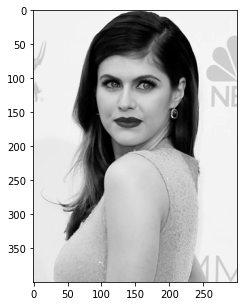

In [104]:
if __name__ == '__main__':
    # reading the image
    girl = cv2.imread('girl.jpg', 0)
    showImage(girl, 5, 5)

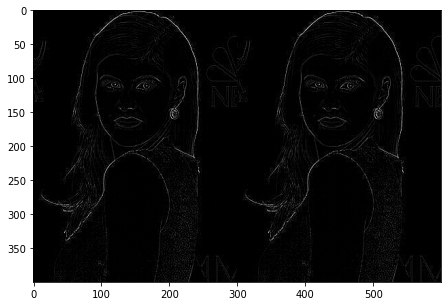

In [105]:
    lap1 = laplasian(girl)
    lap2 = cv2.Laplacian(girl, -1, borderType=cv2.BORDER_REPLICATE)
    showImage(cv2.hconcat([lap1, lap2]), 10, 5)

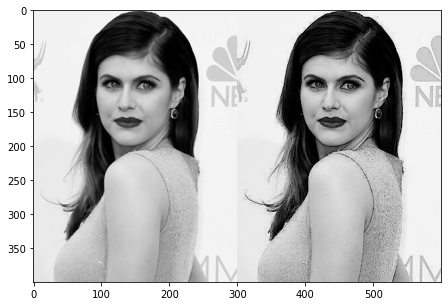

In [108]:
    result = cv2.subtract(girl,lap1) # substracting since center coefficient of mask is negative
    showImage(cv2.hconcat([girl, result]), 10, 5)